# Pandas

While all data can be reduced to numbers and therefore to Numpy arrays, very often data contain different types of information: numbers, text, dates etc. Therefore we need a way to import such data and organise them so that we can *then* do Machine Learning on them. The most popular library in Python for this is Pandas. We are presenting here only the bare minimum functionalities and will see more advanced aspects while we progress in the course.

The main data structure that we will use in this course is the ```DataFrame```. It is a table of data with rows (indices) and columns where usually each row is an item of the dataset and the columns the various properties of that object. We will briefly mention later how to create Dataframes from scratch, but most commonly they are directly created when importing data via Pandas. 

## A real dataset

Instead of simply importing existing data, we will try to make here a more realistic example where you record data and then import them using Pandas. For that we will use the [phyphox app](https://phyphox.org/) which allows to use the phone's sensor to record various types of data. Here we use acceleration data (top row). If you want to acquire your own data:
- download the app and open it
- tap on Acceleration
- use the play button to record and stop
- use the three dots to export the data
- pick your favourite format (here we use CSV)
- send it to your email, download it to your computer and unzip it
- copy the ```Raw data.csv``` file to the ```datasets``` folder and rename it

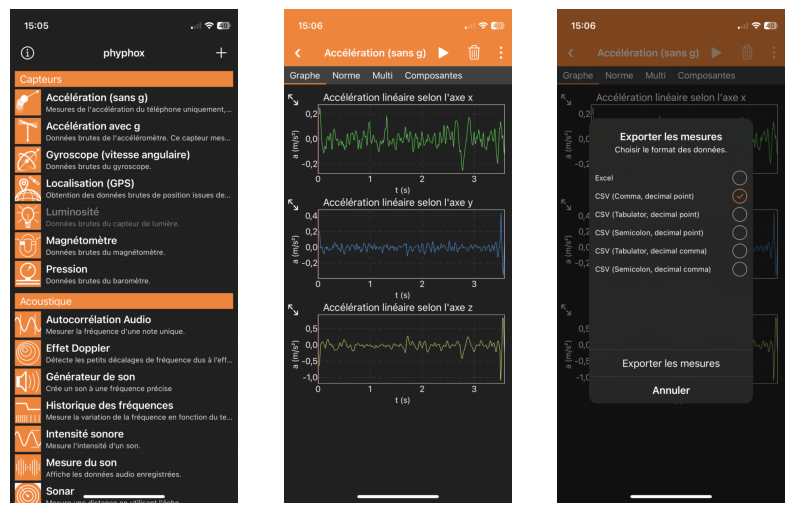

In [53]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

fig, ax = plt.subplots(1,3, figsize=(10,8))
for i in range(3):
    ax[i].imshow(imread(f'illustrations/phyphox{i+1}.png'))
    ax[i].set_axis_off()

## Importing Dataframes

To read the data we generated, we use on of the many Pandas functions called ```pd.read_xxx```. Those are capable to read most of the popular table and database formats such as CSV, SQL, Excel etc. The file can be read either directly on disk or from an online repository. Here we read one of the accleretion datasets:

In [54]:
import pandas as pd
import numpy as np

In [55]:
running = pd.read_csv('datasets/running.csv')

We can quickly visualize the table using the ```head()``` function:

In [56]:
running.head(5)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.003109,-0.324983,0.969946,-0.730077,1.256750
1,0.013060,-0.249482,1.201871,-0.092081,1.230940
2,0.023011,-0.473437,1.047375,-0.016284,1.149522
3,0.032961,-0.559688,1.009391,-0.671176,1.335139
4,0.042913,-0.582195,1.142839,-0.816608,1.520487


The data structures underlying DataFrames are actually Numpy arrays. Hence a large part of the features seen on arrays is similar here. For example we can get the size of the DataFrame:

In [57]:
running.shape

(1669, 5)

Or use logical operations:

In [58]:
running > 0

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,True,False,True,False,True
1,True,False,True,False,True
2,True,False,True,False,True
3,True,False,True,False,True
4,True,False,True,False,True
...,...,...,...,...,...
1664,True,True,False,False,True
1665,True,True,False,True,True
1666,True,True,False,True,True
1667,True,True,False,False,True


## Index and column

One of the main differences between Numpy arrays and Pandas DataFrames is that the elements in the table are not located by their "numerical position" but by their corresponding index and column. These two elements are in fact just list of values:

In [59]:
running.index

RangeIndex(start=0, stop=1669, step=1)

In [60]:
running.columns

Index(['Time (s)', 'Linear Acceleration x (m/s^2)',
       'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)',
       'Absolute acceleration (m/s^2)'],
      dtype='object')

If needed, this row and column names can be changed. For example using the ```rename``` method:

In [61]:
running = running.rename(columns={'Linear Acceleration x (m/s^2)': 'acc_x'})
running.head(5)

,Time (s),acc_x,Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.003109,-0.324983,0.969946,-0.730077,1.256750
1,0.013060,-0.249482,1.201871,-0.092081,1.230940
2,0.023011,-0.473437,1.047375,-0.016284,1.149522
3,0.032961,-0.559688,1.009391,-0.671176,1.335139
4,0.042913,-0.582195,1.142839,-0.816608,1.520487


Note that it's essential to re-assign the result to the ```running``` variable. Otherwise the update is not saved. Instead one can also use the ```inplace``` argument:

In [62]:
running.rename(columns={'Linear Acceleration y (m/s^2)': 'acc_y'}, inplace=True)
running.head(5)

,Time (s),acc_x,acc_y,Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.003109,-0.324983,0.969946,-0.730077,1.256750
1,0.013060,-0.249482,1.201871,-0.092081,1.230940
2,0.023011,-0.473437,1.047375,-0.016284,1.149522
3,0.032961,-0.559688,1.009391,-0.671176,1.335139
4,0.042913,-0.582195,1.142839,-0.816608,1.520487


## Accessing values

We have seen that with arrays we could use slicing of the form ```myarray[0:3, 5:8]``` to recover a smaller array with rows 1-2 and colums 5-7. With DataFrames we can also use rows and column numbers to create a sub-DataFrame, but we can also use directly the indices and column names for that. To clarify this distinction, one has to use the methods ```loc``` (rows and column names) and ```iloc``` (rows and column numbers). For example to recover the rows 1-3, and columns 1-2 we would use:

In [63]:
running.iloc[1:4, 1:3]

,acc_x,acc_y
1,-0.249482,1.201871
2,-0.473437,1.047375
3,-0.559688,1.009391


To recover by name we can now use ```loc```:

In [64]:
running.loc[1:4, ['acc_x', 'acc_y']]

,acc_x,acc_y
1,-0.249482,1.201871
2,-0.473437,1.047375
3,-0.559688,1.009391
4,-0.582195,1.142839


Full columns can also be extracted either via simple brackets or via the dot notation:

In [65]:
running['acc_y']

0       0.969946
1       1.201871
2       1.047375
3       1.009391
4       1.142839
          ...   
1664   -1.932569
1665   -2.002361
1666   -2.109095
1667   -2.096657
1668   -2.080130
Name: acc_y, Length: 1669, dtype: float64

In [66]:
running.acc_y

0       0.969946
1       1.201871
2       1.047375
3       1.009391
4       1.142839
          ...   
1664   -1.932569
1665   -2.002361
1666   -2.109095
1667   -2.096657
1668   -2.080130
Name: acc_y, Length: 1669, dtype: float64

Sometimes we will need to access the underlying Numpy arrays. This can be done with the ```values``` parameter:

In [67]:
running.acc_x.values

array([-0.32498298, -0.24948169, -0.47343677, ...,  0.80615387,
        0.57940352,  0.49876925])

Finally, importantly we can also use logical indexing as we did for Numpy arrays. For example we can create a column filled with True/False values and use that column for indexing:

In [68]:
running.acc_x > 0

0       False
1       False
2       False
3       False
4       False
        ...  
1664     True
1665     True
1666     True
1667     True
1668     True
Name: acc_x, Length: 1669, dtype: bool

In [69]:
running[running.acc_x > 0.0]

,Time (s),acc_x,acc_y,Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
18,0.182229,0.057034,0.583650,-1.521858,1.630936
19,0.192180,0.077633,0.516663,-1.526978,1.613886
20,0.202132,0.147402,0.481125,-1.634966,1.710649
21,0.212083,0.157856,0.495523,-1.994007,2.060710
22,0.222034,0.108157,0.524876,-2.253597,2.316440
...,...,...,...,...,...
1664,16.561781,1.248954,-1.932569,-0.004089,2.301027
1665,16.571733,1.178915,-2.002361,0.030478,2.323837
1666,16.581684,0.806154,-2.109095,0.005157,2.257918
1667,16.591635,0.579404,-2.096657,-0.091503,2.177166


## Adding columns

It is also very easy to add a new column to an existing DataFrame. For that you just assign a list or a single value to a not yet existing column:

In [70]:
running['new column'] = 1
running

,Time (s),acc_x,acc_y,Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),new column
0,0.003109,-0.324983,0.969946,-0.730077,1.256750,1
1,0.013060,-0.249482,1.201871,-0.092081,1.230940,1
2,0.023011,-0.473437,1.047375,-0.016284,1.149522,1
3,0.032961,-0.559688,1.009391,-0.671176,1.335139,1
4,0.042913,-0.582195,1.142839,-0.816608,1.520487,1
...,...,...,...,...,...,...
1664,16.561781,1.248954,-1.932569,-0.004089,2.301027,1
1665,16.571733,1.178915,-2.002361,0.030478,2.323837,1
1666,16.581684,0.806154,-2.109095,0.005157,2.257918,1
1667,16.591635,0.579404,-2.096657,-0.091503,2.177166,1


## Droping items
Inversely we can remove columns and rows by using the ```drop()``` function. Again here, to get the modified version of ```running``` we have to re-assign it or use ```inplace```:

In [71]:
running.drop(columns=['Time (s)'], inplace=True)
running.head(5)

,acc_x,acc_y,Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),new column
0,-0.324983,0.969946,-0.730077,1.256750,1
1,-0.249482,1.201871,-0.092081,1.230940,1
2,-0.473437,1.047375,-0.016284,1.149522,1
3,-0.559688,1.009391,-0.671176,1.335139,1
4,-0.582195,1.142839,-0.816608,1.520487,1


In [72]:
running.drop(index=[0,4], inplace=True)
running.head(5)

,acc_x,acc_y,Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),new column
1,-0.249482,1.201871,-0.092081,1.230940,1
2,-0.473437,1.047375,-0.016284,1.149522,1
3,-0.559688,1.009391,-0.671176,1.335139,1
5,-0.392871,1.124898,-0.637171,1.351195,1
6,-0.199147,1.053358,-0.444545,1.160536,1


## Importing data

Until now we have always used the ```reader_XXX``` functions with default options. However these functions have many options, in particular regarding the choice of indices and column names. For example, we can specify if we want to use **one of the columns as index** when importing data. Each data format will present its own challenges, and we present here some core concepts.

Here we are using the dataset that you can find [here](https://github.com/guiwitz/NumpyPandas_course/blob/master/Data/composers.xlsx). It is a simple collection of Excel sheet with information regarding classical composers. These simple and rather short dataset will allow us to explore many of the problems that you might encounter with "real" datasets.

First we need a new importer function for Excel:

In [73]:
file_url = 'https://github.com/guiwitz/NumpyPandas_course/blob/master/Data/composers.xlsx?raw=true'
composers = pd.read_excel(file_url)
composers

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


### Setting indices
Again, by default Pandas sets a numerical index. However here each composer name is unique, so we could use that as an index. We can specify this to our importer with the ```index_col``` option:

In [74]:
composers = pd.read_excel(file_url, index_col='composer')
composers

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


### Skipping rows

Instead of dropping certains rows at the start or end of the table, we can also directly do that at import time by specifying the ```skipfooter```  and ```skiprows``` arguments. Let's for example remove the first line (note that we remove the row with index 1, i.e. the second one, as we want to keep the headers):

In [75]:
composers = pd.read_excel(file_url, index_col='composer', skiprows=[1])
composers

,birth,death,city
composer,,,
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


We can also specify a list of columns that we actually want to use with the ```usecols``` option. For example we could skip the ```city```:

In [76]:
composers = pd.read_excel(file_url, index_col='composer', usecols=['composer','birth', 'death'])
composers

,birth,death
composer,,
Mahler,1860,1911
Beethoven,1770,1827
Puccini,1858,1924
Shostakovich,1906,1975


### Format-specific options 
Finally, for each importer, we have specific options only available in that format. For example with the Excel importer we can specify sheets to import. By default it imports the first one, but we can also indicate the position of the sheet or its name:

In [77]:
composers = pd.read_excel(file_url, sheet_name=4)
composers.head(5)

,composer,birth,death,period,country
0,Mahler,1860,1911.0,post-romantic,Austria
1,Beethoven,1770,1827.0,romantic,Germany
2,Puccini,1858,1924.0,post-romantic,Italy
3,Shostakovich,1906,1975.0,modern,Russia
4,Verdi,1813,1901.0,romantic,Italy


## Saving tables

Most commonly, you don't save many tables. You just keep a notebook or a script for processing and only keep the final output such as a statistics or a plot. However sometimes you want to keep intermediary steps. For that we can use the reverse of the ```read_XXX``` function, i.e the ```to_XXX``` function. Here again, you have plenty of options that you can explore. For example you can avoid saving the index and use ```;``` as separator:


In [78]:
composers.to_csv('export_test.csv', index=False, sep=';')

## Creating DataFrames

Just for the completeness of this presentation, note that one can also create DataFrames from scratch. There are multiple ways to do this. For example one can turn a simple array into a DataFrame and manually name the columns:

In [79]:
my_array = np.random.randint(0, 100, ((3,5)))
my_array

array([[35,  2, 62, 37, 27],
       [ 4, 23, 96, 50, 35],
       [87, 95, 86, 71, 44]])

In [80]:
my_df = pd.DataFrame(my_array, columns=['a', 'b', 'c', 'd', 'e'])
my_df

,a,b,c,d,e
0,35,2,62,37,27
1,4,23,96,50,35
2,87,95,86,71,44


Alternatively one can also use dictionaries that allow us to automatically generate appropriate column names. We need here a **dictionary of lists** where each element of the dictionary defines a column. For example:

In [81]:
dict_of_list = {
    'birth': [1860, 1770, 1858, 1906],
    'death':[1911, 1827, 1924, 1975], 
    'city':['Kaliste', 'Bonn', 'Lucques', 'Saint-Petersburg']
    }

In [82]:
pd.DataFrame(dict_of_list)

,birth,death,city
0,1860,1911,Kaliste
1,1770,1827,Bonn
2,1858,1924,Lucques
3,1906,1975,Saint-Petersburg


## Exercises
1. Import the penguin dataset https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv
2. Rename the ```bill_length_mm``` and ```bill_depth_mm``` colums into ```length``` and ```depth```.
3. Check that the names of the DataFrame have changed. If not, do you understand why?
4. Add a column with name ```my_column``` and fill it with default value 'test'.

5. Import again the data but this time only the 10 first rows. Can you find an option of the ```read_csv``` function to do that?
6. Create a new dataframe ```new_dataframe``` by extracting the ```species```, ```bill_length_mm``` and ```body_mass_g``` columns.
7. Extract the row with index 4 of ```new_dataframe```
8. Extract the ```bill_length_mm``` of the 3 first rows of ```new_dataframe```
9. Extract all rows for which the ```body_mass_g > 6000```
